In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
from math import *

In [23]:
#function to convert rgb 2 gray
def rgb2gray(rgb):
    return np.dot(rgb, [0.2989, 0.5870, 0.1140])
def Forb_norm(s):             #Forb norm using singular values
    return sqrt(s @ s)
def Forb_norm_mat(A):         #Forb norm using matrix directly
    return sqrt(sum(sum(A**2)))

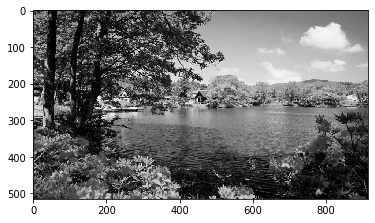

In [24]:
os.chdir(r'E:\Sem6\PRML\Programaming_Assignment\29_ ME17B176_ ME17B175')
img_rgb=mpimg.imread('29.jpg')
img=rgb2gray(img_rgb)
plt.imshow(img,cmap='gray')

In [27]:
#Image size = 515 x 915
N = np.array([0.1,0.25,0.5]) #Proportion that need to be taken for top
quality=np.zeros(N.shape)
img_df=pd.DataFrame(columns=['Top10%','Top25%','Top50%','Random10%','Original'])
img_df['Original']=img.flatten()
A = img
A=A.transpose()  # As columns are more than rows
n,d=A.shape      #n = 915, d = 515
x_bar=np.mean(A,0)
A_n = np.array([A[i,:]-x_bar for i in range(n)])
C=(A.transpose() @ A)/A.shape[0]  # Covariance matrix of A
lam , P = np.linalg.eig(C)        #Eiegen Values and orthonormal Eigen Vectors
idx = lam.argsort()[::-1]         #Eigen Values and corresponding eigen vectors are sorted in descending order
lam = lam[idx]
P = P[:,idx]
nnz_eig_values=np.count_nonzero(lam)

In [28]:
for i in range(N.size):
    p = ceil(N[i]*nnz_eig_values)
    A_r=np.zeros((n,d))
    for j in range(n):
        for k in range(p):
             A_r[j,:]+=((A[j,:] @ P[:,k])*P[:,k]).transpose()
        for k in range(p+1,d):
             A_r[j,:]+=((x_bar @ P[:,k])*P[:,k]).transpose()
    A_r=A_r.transpose()
    img_df.iloc[:,i]=A_r.flatten()
    quality[i]=100*Forb_norm_mat(A_r)/Forb_norm_mat(A)

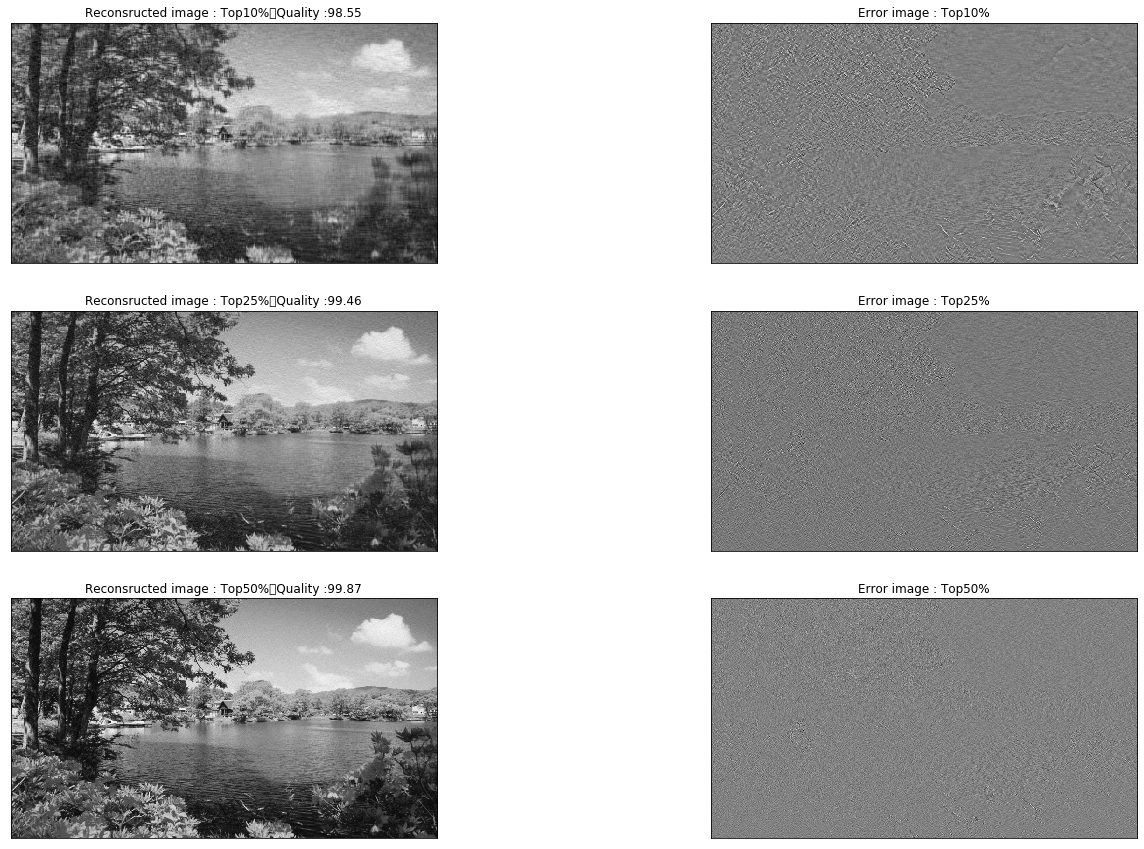

In [29]:
fig, axes = plt.subplots(3,2,figsize=(23,15),subplot_kw={'xticks':[], 'yticks':[]})
s=['Top10%','Top25%','Top50%']
for i in range(3):
    axes[i][0].imshow(img_df.iloc[:,i].values.reshape(515,915),cmap='gray')
    axes[i][0].title.set_text('Reconsructed image : '+s[i]+'\tQuality :'+"{0:4.2f}".format(quality[i]))
for i in range(3):
    axes[i][1].imshow(img-img_df.iloc[:,i].values.reshape(515,915),cmap='gray')
    axes[i][1].title.set_text('Error image : '+s[i])

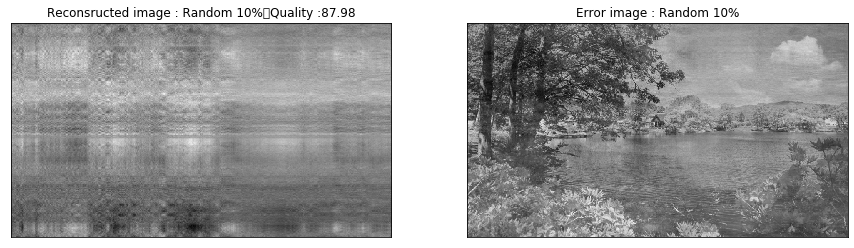

In [37]:
# Random 10%
p=np.random.choice(range(lam.size),ceil(0.1*nnz_eig_values))
p_bar=np.array(range(lam.size))
p_bar=np.delete(p_bar,p)
A_r=np.zeros((n,d))
for j in range(n):
    for k in p:
         A_r[j,:]+=((A[j,:] @ P[:,k])*P[:,k]).transpose()
    for k in p_bar:
         A_r[j,:]+=((x_bar @ P[:,k])*P[:,k]).transpose()
A_r=A_r.transpose()
img_df.iloc[:,3]=A_r.flatten()
quality_random=100*Forb_norm_mat(A_r)/Forb_norm_mat(A)
f, ax = plt.subplots(1,2,figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]})
ax[0].imshow(img_df.iloc[:,3].values.reshape(515,915),cmap='gray')
ax[0].title.set_text('Reconsructed image : Random 10%'+'\tQuality :'+"{0:4.2f}".format(quality_random))
ax[1].imshow(img-img_df.iloc[:,3].values.reshape(515,915),cmap='gray')
ax[1].title.set_text('Error image : Random 10%')

Text(0.5, 1.0, 'Reconstruction error vs Top N principal Components')

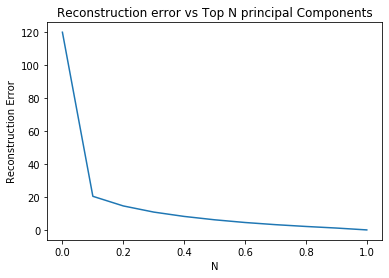

In [40]:
N_axis=np.linspace(0,1,num=11,endpoint=True)
rec_error=np.zeros(N_axis.size)
for i in range(N_axis.size):
    p = ceil(N_axis[i]*nnz_eig_values)
    A_r=np.zeros((n,d))
    for j in range(n):
        for k in range(p):
             A_r[j,:]+=((A[j,:] @ P[:,k])*P[:,k]).transpose()
        for k in range(p+1,d):
             A_r[j,:]+=((x_bar @ P[:,k])*P[:,k]).transpose()
    A_err=A-A_r
    rec_error[i]=Forb_norm_mat(A_err)/np.sqrt(A_err.shape[0]*A_err.shape[1])
plt.plot(N_axis,rec_error)
plt.xlabel('N')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error vs Top N principal Components')